\section*{a)}

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
##### constantes #####
kv=1.63 # 1/día
kI=0.49 # 1/día
gamma=0.45 # 1/día
a = 0.0
b = 8.0
N = 1000
h = (b-a)/N
######################


def f(r,t):
    Nv=r[0]
    NI=r[1]
    fNv=-kv*Nv + gamma*NI
    fNI=-kI*NI
    return np.array([fNv,fNI],float)

def rk4_2d(f,a,b,N,Init_cond=[0,0]):
    h = (b-a)/N
    tpoints = np.arange(a,b,h)
    xpoints = []
    ypoints = []
    r = np.array(Init_cond,float)
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    return tpoints,xpoints,ypoints

In [13]:
cond_inciales=[1.5e5,1.02e5]

tpoints,NV,NI=rk4_2d(f,a,b,N,Init_cond=cond_inciales)

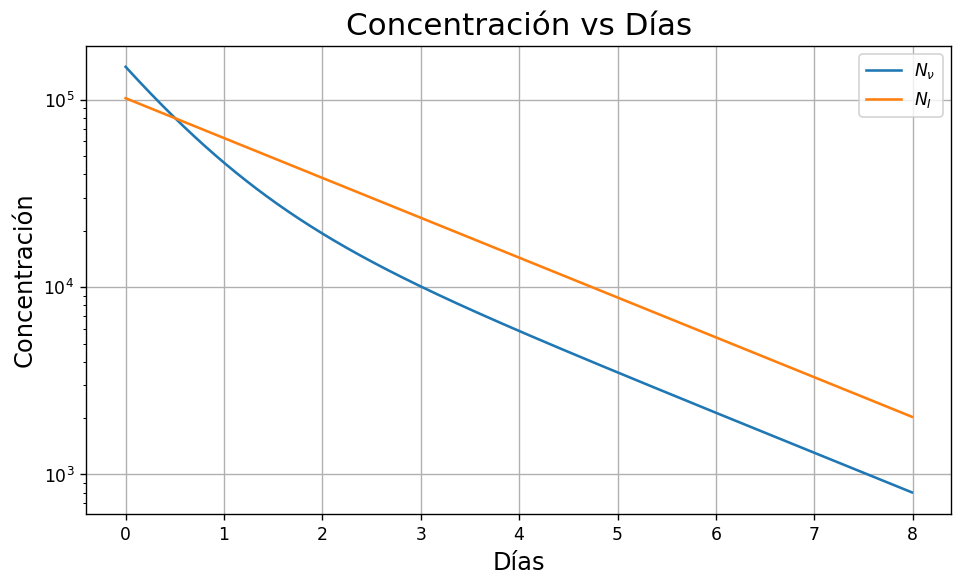

In [14]:
plt.figure(figsize=(9,5),dpi=124)
plt.plot(tpoints,NV,label=r'$N_\nu$')
plt.plot(tpoints,NI,label=r'$N_I$')
plt.semilogy()
plt.ylabel("Concentración",size=14)
plt.xlabel("Días",size=14)
plt.legend()
plt.title('Concentración vs Días',size=18)
plt.grid()
plt.show()

\section*{b)}

Asumiendo que el medicamento antiviral detiene completamente las infecciones de las células T en el día $t=0$. Observamos que la concentración del virus decae rápidamente de manera exponencial, incluso mueren más rapido que lo que se eliminan las células T del sisteman inmunológico en el primer día.
Para el segundo día en adelante ambas concentraciones decaen exponencialmente.